# PCA (Reducción de dimensiones)
Tomando en cuenta el DataSet que elegimos, tenemos que el número de columnas del cual esta conformado son 23 y el número de registros existentes son 30,000, por lo que, es una inmensidad de datos a trabajar, por ello vamos aplicar este modelo para la reducción de datos con el objetivo de que en un fututo se pueda trabajar de manera más eficiente

In [ ]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import  StandardScaler

In [ ]:
# Carga del dataset deescargado de https://www.kaggle.com/code/acr1209/eda-spotify-tracks
df_spotify = pd.read_csv('spotify_songs.csv')
df_spotify

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


  Visualisamos las columnas que tiene el CSV

In [ ]:
df_spotify.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [ ]:
# Cargar el DataFrame desde el archivo CSV
df_spotify = pd.read_csv('spotify_songs.csv')

# Seleccionar las columnas deseadas
columnas_deseadas = ['track_id', 'track_name', 'playlist_genre', 'track_artist', 'tempo', 'valence','liveness','instrumentalness','acousticness','energy','danceability', 'loudness']

# Filtrar las filas según los valores de la columna 'playlist_genre'
df_filtrado = df_spotify[df_spotify['playlist_genre'].isin(['rock', 'pop', 'rap'])][columnas_deseadas]

# Seleccionar aleatoriamente 200 filas para cada género
df_final = pd.DataFrame()
generos_seleccionados = ['rock', 'pop', 'rap']
for genero in generos_seleccionados:
    df_genero = df_filtrado[df_filtrado['playlist_genre'] == genero]
    filas_seleccionadas = df_genero.sample(n=200, random_state=42)
    df_final = pd.concat([df_final, filas_seleccionadas])

# Guardar el DataFrame final en un nuevo archivo CSV
df_final.to_csv('spotify_songs_final.csv', index=False)


In [ ]:
# Cargar el DataFrame desde el archivo CSV
df_spotiFil = pd.read_csv('spotify_songs_final.csv')

# Seleccionar las columnas deseadas
columnas_deseadas1 = ['instrumentalness','loudness','energy','tempo','danceability','valence','liveness','acousticness']

# Filtrar las filas según los valores de la columna 'playlist_genre'
df_filtrado1 = df_spotiFil[df_spotiFil['playlist_genre'].isin(['rock', 'pop', 'rap'])][columnas_deseadas1]

# Guardar el DataFrame final en un nuevo archivo CSV
df_filtrado1.to_csv('spotify_final.csv')

In [ ]:
df = pd.read_csv('spotify_final.csv')
df

,Unnamed: 0,instrumentalness,loudness,energy,tempo,danceability,valence,liveness,acousticness
0,0,0.000009,-10.394,0.744,130.560,0.477,0.667,0.1250,0.070400
1,1,0.000000,-5.287,0.318,199.314,0.378,0.495,0.1230,0.739000
2,2,0.000000,-11.897,0.447,119.453,0.845,0.953,0.0782,0.470000
3,3,0.000000,-8.815,0.629,153.119,0.574,0.786,0.2710,0.128000
4,4,0.000098,-4.196,0.886,114.025,0.557,0.170,0.0904,0.000595
...,...,...,...,...,...,...,...,...,...
595,595,0.000000,-2.510,0.925,149.980,0.784,0.208,0.3450,0.002690
596,596,0.000000,-2.673,0.894,162.193,0.431,0.604,0.1880,0.095100
597,597,0.000005,-4.859,0.670,150.093,0.457,0.267,0.1050,0.276000
598,598,0.000529,-2.957,0.668,87.972,0.883,0.676,0.0734,0.110000


Visualizo las columnas que quieremos ocupar ene el orden que queremos trabajar,

1. Instrumentalidad.
2. Sonoridad
3. Energía.
4. Tempo.
5. Bailabilidad.
6. Valencia.
7. Vivacidad.
8. Acústica



In [ ]:
df.columns

Index(['Unnamed: 0', 'instrumentalness', 'loudness', 'energy', 'tempo',
       'danceability', 'valence', 'liveness', 'acousticness'],
      dtype='object')

In [ ]:
df.isnull().sum()

Unnamed: 0          0
instrumentalness    0
loudness            0
energy              0
tempo               0
danceability        0
valence             0
liveness            0
acousticness        0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()


,Unnamed: 0,instrumentalness,loudness,energy,tempo,danceability,valence,liveness,acousticness
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,299.500000,0.078584,-7.096767,0.694340,124.712742,0.616493,0.510858,0.199763,0.181949
std,173.349358,0.222704,3.214713,0.191278,29.275597,0.161543,0.228525,0.159634,0.228974
min,0.000000,0.000000,-22.618000,0.069500,63.245000,0.149000,0.029400,0.028200,0.000002
25%,149.750000,0.000000,-8.788000,0.566500,100.127750,0.512500,0.343750,0.096550,0.015750
50%,299.500000,0.000012,-6.353000,0.721500,124.036000,0.621500,0.506000,0.139500,0.085650
75%,449.250000,0.003458,-4.777500,0.846250,143.878000,0.734000,0.687250,0.264250,0.254750
max,599.000000,0.962000,-1.869000,0.995000,206.247000,0.950000,0.975000,0.985000,0.986000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        600 non-null    int64  
 1   instrumentalness  600 non-null    float64
 2   loudness          600 non-null    float64
 3   energy            600 non-null    float64
 4   tempo             600 non-null    float64
 5   danceability      600 non-null    float64
 6   valence           600 non-null    float64
 7   liveness          600 non-null    float64
 8   acousticness      600 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 42.3 KB


COVARIANZA

Para porder lograr una disminucion de dimemenciones es importante saber la relacion que estos tienen entre si para ello es importante saber la relacion que estos tienen entre si para eso realizamos la covarianza.

que es la metrica en la que valoramos la relacion de columnas.

In [ ]:
#realizamos toda la correlacion de tos
#1 relacionado 0 nada -1 relacion inversa datos los datos
df.corr()

,Unnamed: 0,instrumentalness,loudness,energy,tempo,danceability,valence,liveness,acousticness
Unnamed: 0,1.000000,0.098593,0.094859,-0.166944,-0.080569,0.455297,-0.063159,-0.013421,0.064696
instrumentalness,0.098593,1.000000,-0.293295,-0.227953,-0.010296,-0.069676,-0.136719,-0.012714,0.284685
loudness,0.094859,-0.293295,1.000000,0.704712,0.081206,-0.039302,0.007740,0.049299,-0.429836
energy,-0.166944,-0.227953,0.704712,1.000000,0.173493,-0.208350,0.153440,0.129730,-0.584305
tempo,-0.080569,-0.010296,0.081206,0.173493,1.000000,-0.253626,0.012445,0.013817,-0.100705
danceability,0.455297,-0.069676,-0.039302,-0.208350,-0.253626,1.000000,0.323324,-0.098805,0.014226
valence,-0.063159,-0.136719,0.007740,0.153440,0.012445,0.323324,1.000000,0.019741,-0.072871
liveness,-0.013421,-0.012714,0.049299,0.129730,0.013817,-0.098805,0.019741,1.000000,-0.128568
acousticness,0.064696,0.284685,-0.429836,-0.584305,-0.100705,0.014226,-0.072871,-0.128568,1.000000


In [ ]:
#normalizacion #
 #(Dato menos la media de los valores del renglon) entre la desviacion estandar
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_array, columns= df.columns)
scaled_df

,Unnamed: 0,instrumentalness,loudness,energy,tempo,danceability,valence,liveness,acousticness
0,-1.729166,-0.353119,-1.026525,0.259841,0.199898,-0.864224,0.683830,-0.468731,-0.487574
1,-1.723393,-0.353158,0.563433,-1.969143,2.550367,-1.477574,-0.069451,-0.481271,2.434838
2,-1.717619,-0.353158,-1.494453,-1.294169,-0.179813,1.415702,1.936379,-0.762146,1.259055
3,-1.711846,-0.353158,-0.534936,-0.341880,0.971115,-0.263265,1.204996,0.446623,-0.235808
4,-1.706072,-0.352716,0.903094,1.002835,-0.365378,-0.368588,-1.492802,-0.685658,-0.792688
...,...,...,...,...,...,...,...,...,...
595,1.706072,-0.353158,1.427995,1.206897,0.863803,1.037779,-1.326379,0.910570,-0.783530
596,1.711846,-0.353158,1.377248,1.044694,1.281324,-1.149215,0.407919,-0.073750,-0.379612
597,1.717619,-0.353137,0.696682,-0.127354,0.867666,-0.988133,-1.067986,-0.594122,0.411092
598,1.723393,-0.350781,1.288831,-0.137819,-1.256043,1.651129,0.723246,-0.792240,-0.314485


In [ ]:
print(scaled_array)

[[-1.72916646 -0.35311866 -1.02652528 ...  0.68383043 -0.46873142
  -0.48757395]
 [-1.72339295 -0.35315821  0.56343335 ... -0.06945078 -0.48127052
   2.4348384 ]
 [-1.71761944 -0.35315821 -1.49445319 ...  1.93637941 -0.76214636
   1.25905478]
 ...
 [ 1.71761944 -0.3531366   0.69668229 ... -1.06798633 -0.59412242
   0.41109188]
 [ 1.72339295 -0.35078088  1.28883058 ...  0.72324631 -0.7922402
  -0.31448462]
 [ 1.72916646 -0.35315821 -0.57727713 ... -0.69134572  0.08298899
  -0.74502249]]


In [ ]:
#aplicar PCA
# se genera compnentes principales composiocion de varios vectores entre dististinas columnas
#para dar un valor unico en donde cada columna influye en las otras
pca = PCA()                                            #dataframe
principalComponents = pca.fit_transform(scaled_array)  #formato de arreglo
principalComponents

array([[-0.38591333,  1.24979536,  1.84628384, ..., -0.69290132,
         0.26998431, -0.24184987],
       [ 1.08472509,  2.69560084,  1.15546345, ...,  1.92214366,
        -0.88822122,  1.55151048],
       [ 1.91018407, -0.61835953,  3.17177304, ...,  0.09737542,
        -0.85804577,  0.07775428],
       ...,
       [-0.06431687,  0.29574266, -1.78388332, ...,  0.68993932,
         0.9149865 ,  0.11068062],
       [-0.08554176, -2.96473061, -0.68066386, ...,  0.34101024,
         0.18649808,  0.51686561],
       [ 0.84548926, -1.32128076, -1.09765679, ..., -1.25066013,
         0.02169391,  0.15607022]])

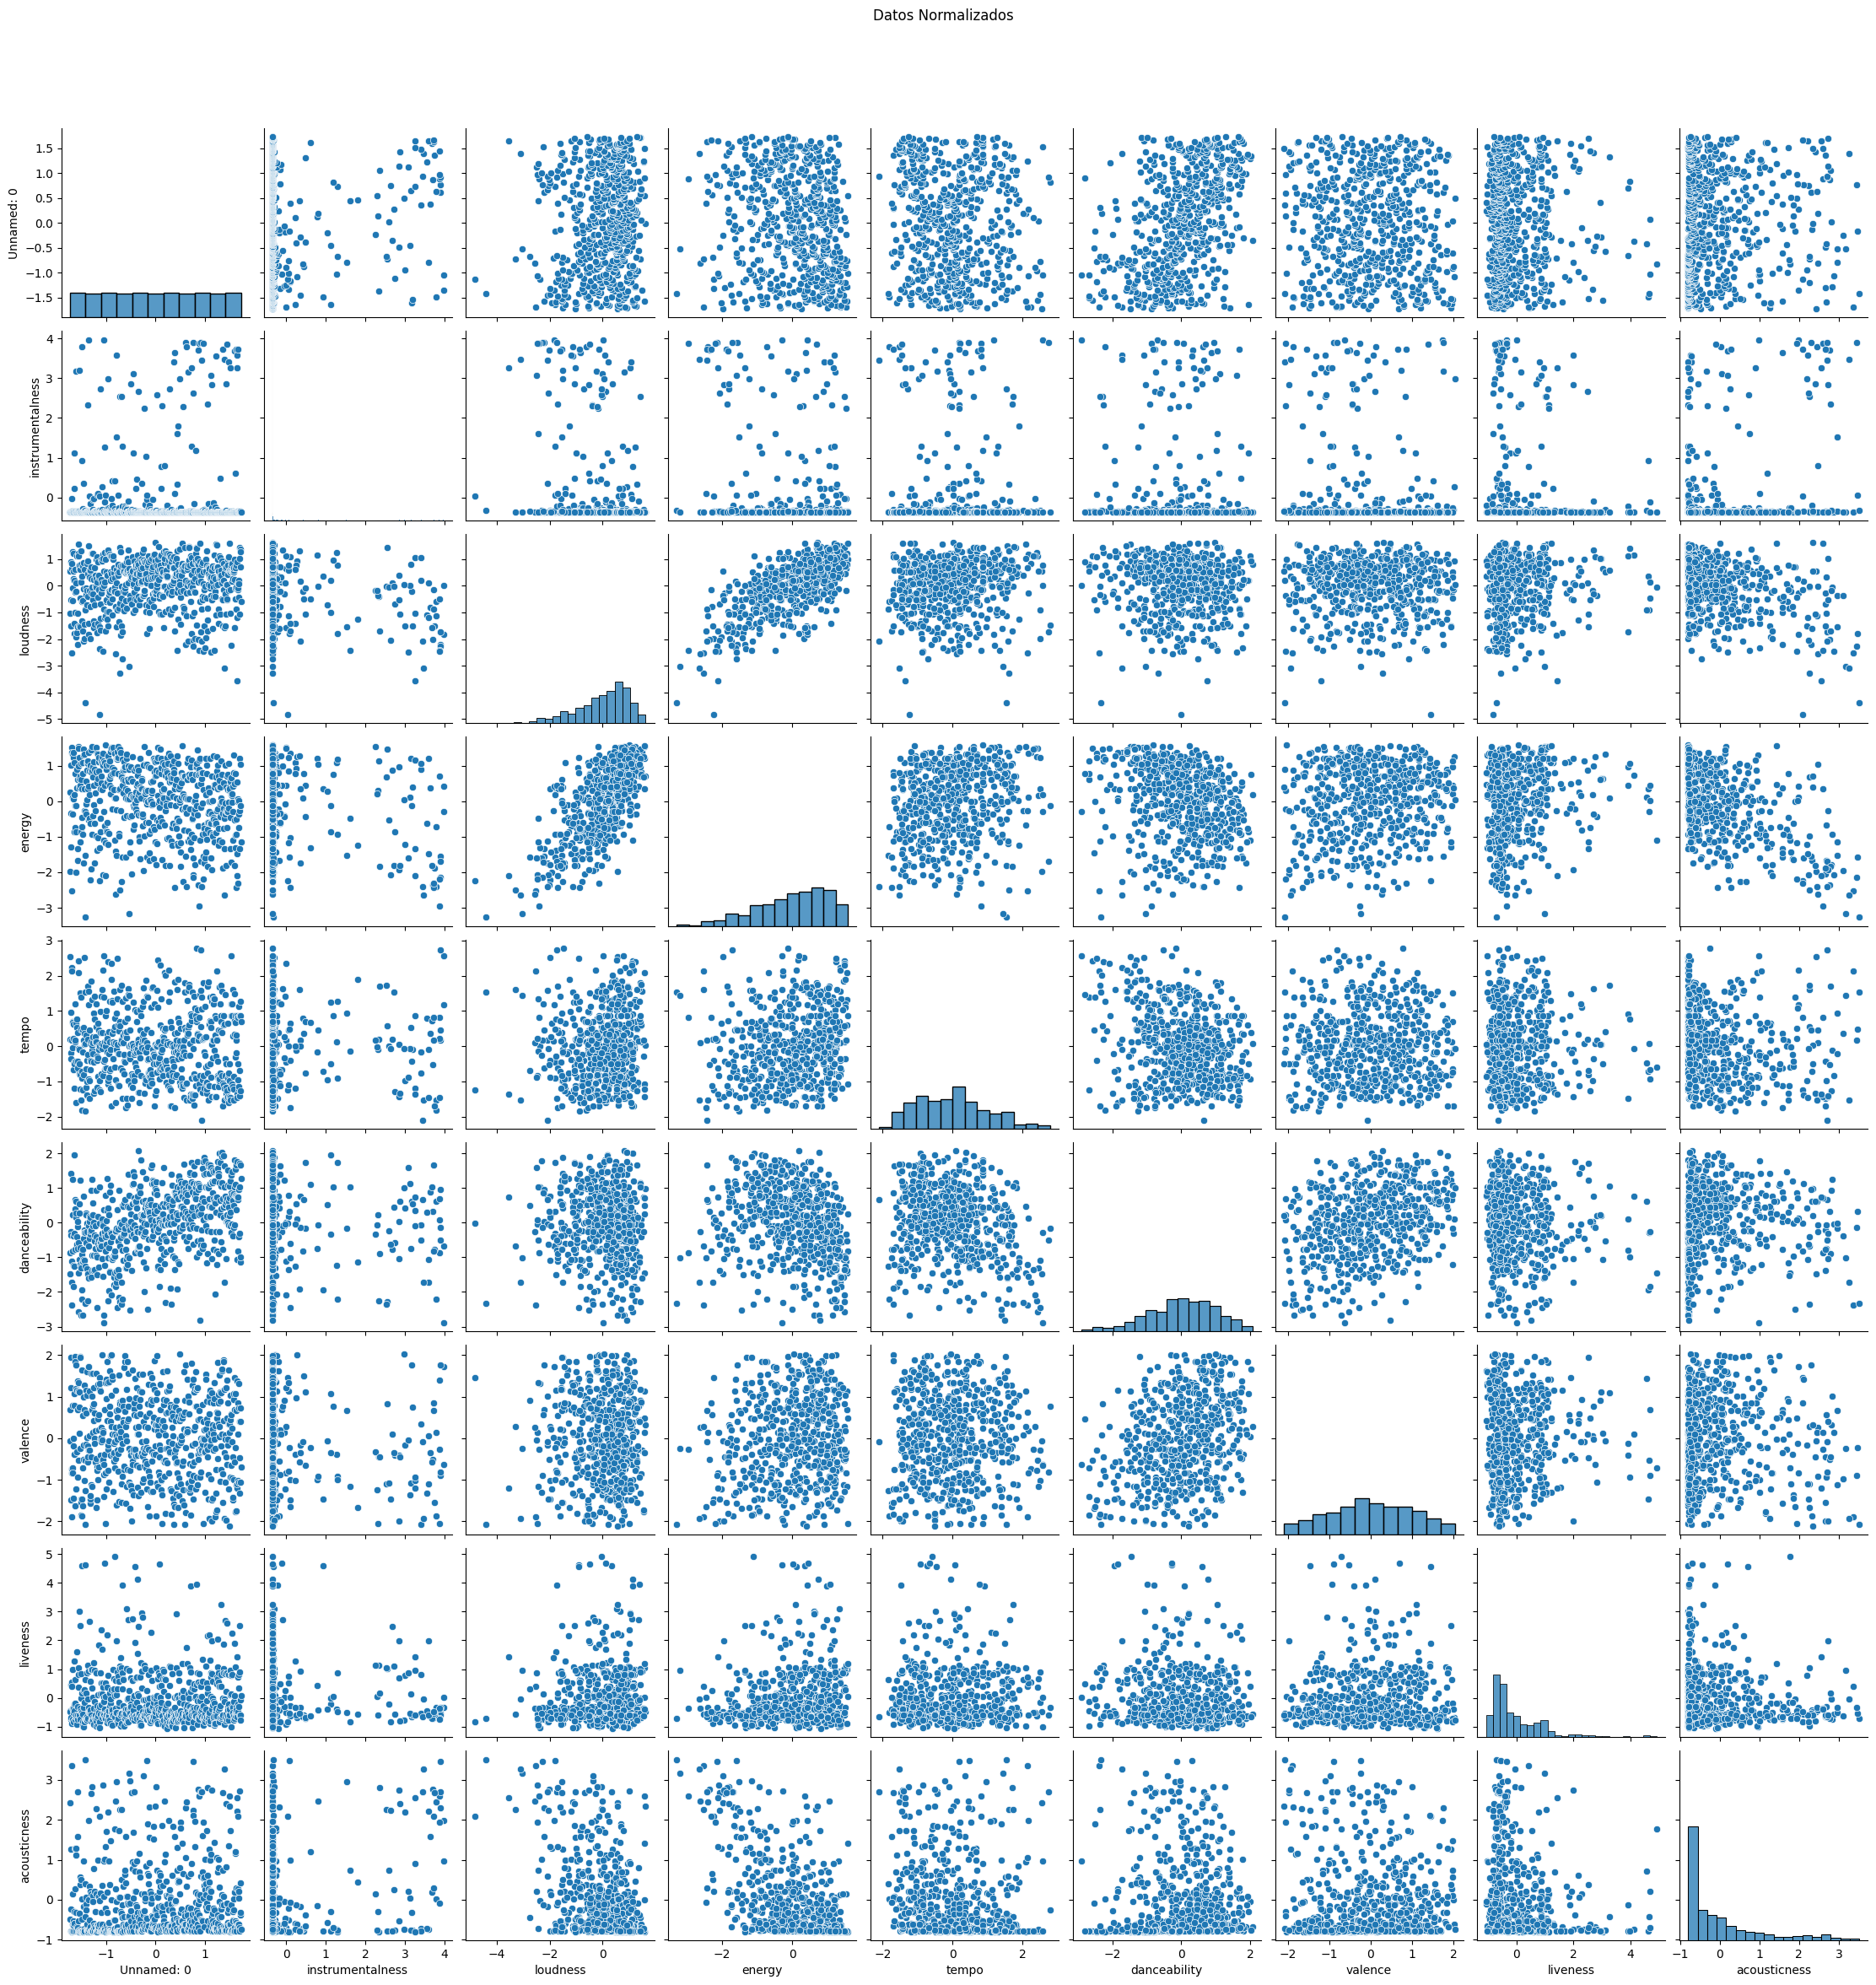

In [ ]:
#visualizar datos Normalizados de los componentes

sns.pairplot(scaled_df)          #comparrar comtra si mismas 8x8
plt.suptitle("Datos Normalizados", y=1.05)
plt.show()

<Axes: >

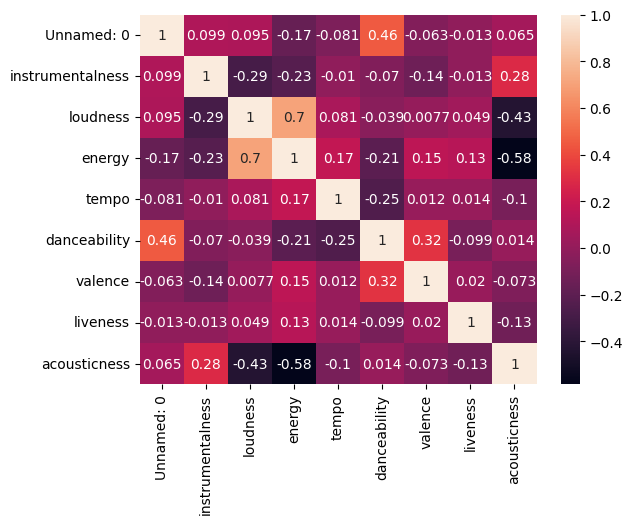

In [ ]:
sns.heatmap(df.corr(),annot=True)

Eigenvalores y Eigenvectores

Seran los valores del plano con los que se proyectarn los datpos conservando la mayor cantidad de datos.

logrando los componenten principales de cada unos de nuetrso datos.

In [ ]:
#Generar la matriz de covarianza, los valores propios y los vectores propios (eigenvalores, eigenvectores)

cov_matrix = np.cov(scaled_array.T)      #genera los componentes principales
eigenvalues, eigenvector = np.linalg.eig(cov_matrix)    #desde la metriz de covariacia genera un arreglo

La varianza explicara sera "porcetaje o medida" que reprensenta el peso de cada componente principal.

In [ ]:
#VARIAZA EXPLICADA los compnentes principales
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.26978129, 0.18016912, 0.12350406, 0.11053765, 0.10475631,
       0.08640407, 0.06477505, 0.03840477, 0.02166768])

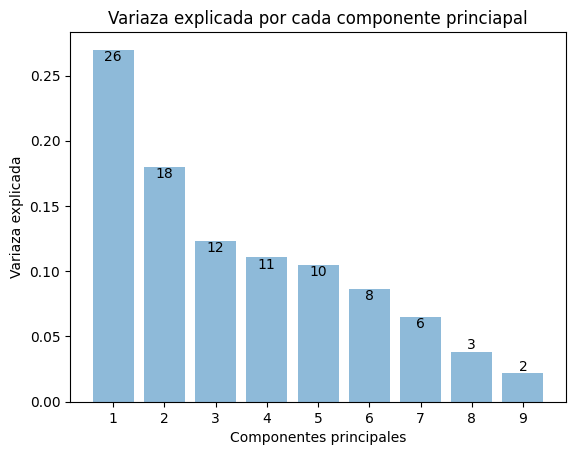

In [ ]:
#Visualizar la varianza explicada
bars = plt.bar(range(len(explained_variance)), explained_variance, align='center', alpha= 0.5)
plt.ylabel("Variaza explicada")
plt.xlabel("Componentes principales")
plt.title("Variaza explicada por cada componente princiapal")


for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval*100), va='bottom' if yval < 0.05 else 'top', ha='center')

  labels = [str(i+1) for i in range(len(explained_variance))]
  plt.xticks(range(len(explained_variance)), labels)

plt.show()

visualizamos cuanto porcentaje de la varianza explica cada componente



1.   PC1    ---->
2.   PC2    ---->
3.   PC3    ---->
4.   PC4    ---->
5.   PC5    ---->
6.   PC6    ---->
7.   PC7    ---->
8.   PC8    ---->



Variaza explicada acumulada

es solo para conocer los porcentajes de explicacion que se tienen cuando de suman los componentes princiaples.

PC1| PC1+PC2|....|PC1+PC2+PC3+PC4PC5+PC6+PC7+PC8

In [ ]:
# Calcular variaza explicada acumulada

cumulative_variance = np.cumsum(explained_variance)
cumulative_variance

array([0.26978129, 0.44995041, 0.57345447, 0.68399212, 0.78874844,
       0.87515251, 0.93992756, 0.97833232, 1.        ])

Se busca quedar con la mayor cantidad de elemntos que expliquen de mejor forma los dtos rediciendo la dimencion

In [ ]:
#encontart el numero de componenetes que explican al menos 65% de varianza

varianza_explicada = 0.85

num_pc = np.where(cumulative_variance >= varianza_explicada)[0][0]+1
print(f"el numero de componetes que explica el {varianza_explicada*100:.0f}% de varianza es {num_pc}")

final_pc =  PCA(n_components = num_pc)
final_data = final_pc.fit_transform(scaled_array)
final_data

el numero de componetes que explica el 85% de varianza es 6


array([[-0.38591333,  1.24979536,  1.84628384, -0.29426607, -0.29045606,
         0.21389465],
       [ 1.08472509,  2.69560084,  1.15546345, -1.21536792,  1.29603528,
        -1.52206781],
       [ 1.91018407, -0.61835953,  3.17177304, -0.29331815,  0.07183863,
         0.03339257],
       ...,
       [-0.06431687,  0.29574266, -1.78388332, -1.05582349,  0.57296931,
        -0.96227187],
       [-0.08554176, -2.96473061, -0.68066386, -0.59903466, -0.35826289,
         0.40130595],
       [ 0.84548926, -1.32128076, -1.09765679, -0.04634791,  0.76110532,
        -1.44046379]])

In [ ]:
final_df =  pd.DataFrame(final_data, columns=[f'PC_{i}' for i in range(1,num_pc+1)])
final_df

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6
0,-0.385913,1.249795,1.846284,-0.294266,-0.290456,0.213895
1,1.084725,2.695601,1.155463,-1.215368,1.296035,-1.522068
2,1.910184,-0.618360,3.171773,-0.293318,0.071839,0.033393
3,-0.372396,0.886734,2.052964,0.436504,0.583019,-0.307156
4,-1.517642,1.147302,-0.280518,-0.976321,-1.495084,0.388851
...,...,...,...,...,...,...
595,-1.639176,-1.133059,-2.358770,0.302372,0.714149,-0.835324
596,-1.758827,-0.157226,-1.143084,-0.492207,1.401445,-0.330537
597,-0.064317,0.295743,-1.783883,-1.055823,0.572969,-0.962272
598,-0.085542,-2.964731,-0.680664,-0.599035,-0.358263,0.401306


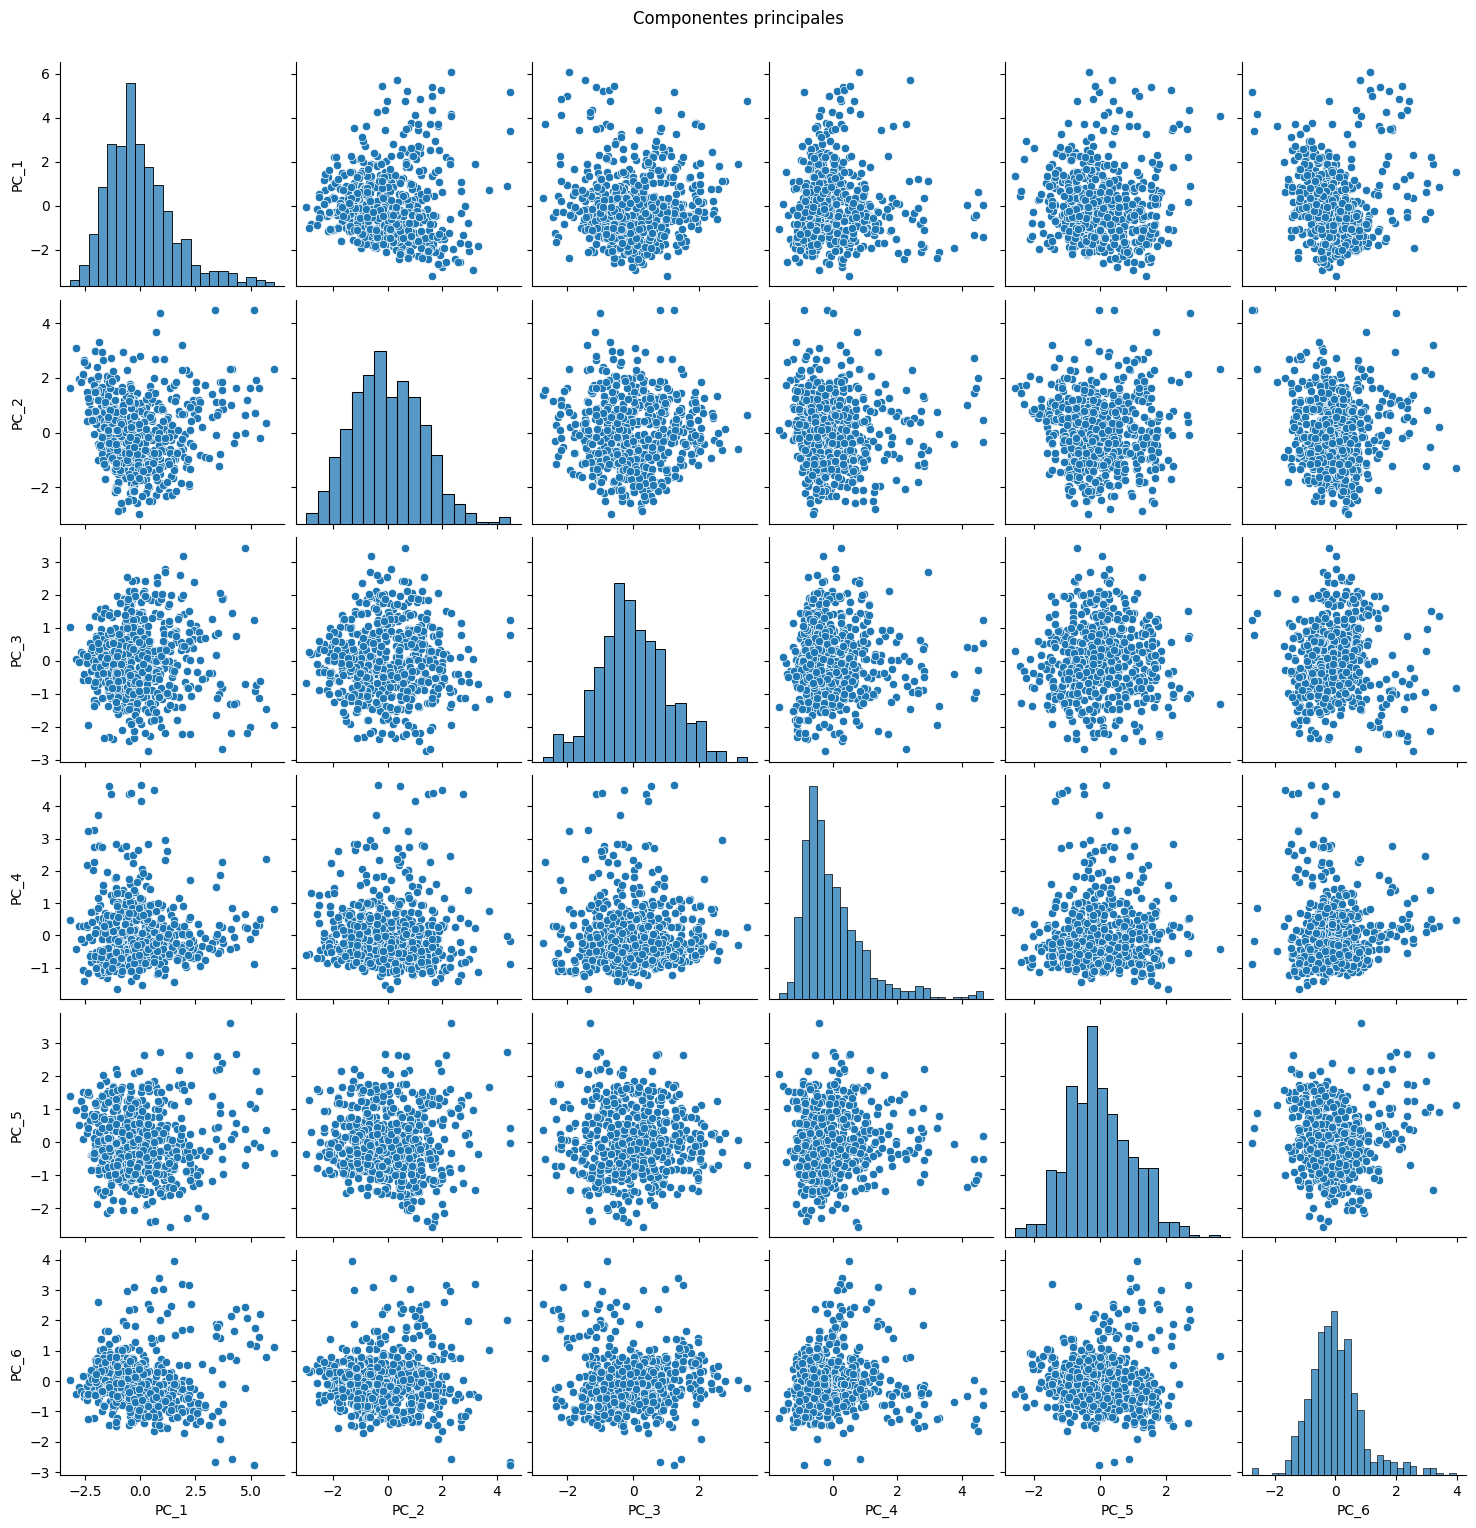

In [ ]:
sns.pairplot(final_df)
plt.suptitle('Componentes principales', y = 1.02)
plt.show()


El código  crea un DataFrame (final_df) a partir de la matriz transformada (final_data) generada por PCA. Cada columna en este DataFrame representa una componente principal (PC), y las columnas están etiquetadas como 'PC_1', 'PC_2', ..., hasta 'PC_4' en este caso, ya que numero de componentes principales es igual a 4.

En la salida que proporcionaste, el DataFrame muestra los valores transformados de cada observación en términos de las componentes principales. Cada fila representa una observación y cada columna 'PC_i' contiene el valor de esa observación en la componente principal correspondiente.

Por ejemplo, en la primera fila:

PC_1 tiene un valor de aproximadamente -0.093198.
PC_2 tiene un valor de aproximadamente 0.139304.
PC_3 tiene un valor de aproximadamente -0.231536.
PC_4 tiene un valor de aproximadamente 0.721757.
Estos valores representan la proyección de la primera observación en el espacio definido por las componentes principales. Cada observación se expresa en términos de estas nuevas variables, las cuales son combinaciones lineales de las variables originales.

En resumen, este DataFrame proporciona una representación de tus datos originales en términos de las componentes principales seleccionadas por PCA. Es una forma de reducir la dimensionalidad de tus datos mientras se retiene la información importante explicada por esas componentes principales.